In [91]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import numpy as np

In [51]:
def PrepareData (tagall):
    ordercode_list = []
    taglist = []
    for order_code in np.unique(tagall.ORDER_CODE):
        taglist_ = tagall.loc[tagall.ORDER_CODE == order_code, 'TagName'].values.tolist() 
        ordercode_list.append(order_code)
        taglist.append(taglist_)
    df = pd.DataFrame({"order_code": ordercode_list, "taglist":taglist})
    return df

In [57]:
def AprioriAnalysis(dfData,min_supp,min_conf):
    DataList = dfData.taglist.values.tolist()
    te = TransactionEncoder()
    df_tf = te.fit_transform(DataList)
    df = pd.DataFrame(df_tf,columns=te.columns_)

    frequent_itemsets = apriori(df,min_support= min_supp,use_colnames= True)
    rules = association_rules(frequent_itemsets,metric = 'confidence',min_threshold = min_conf)
    # rules = rules.drop(rules[rules.lift <1.0].index)
    rules.rename(columns = {'antecedents':'from','consequents':'to','support':'sup','confidence':'conf'},inplace = True)
    rules.sort_values(by = ['sup','conf'],ascending = (False,False))
    return rules

## 关联分析

In [92]:
renal = pd.read_pickle (r'C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\tagall.pkl')

In [93]:
renal

,ORDER_CODE,TAG_ID
0,068138154589,OB6T5MaxEX
1,348099327682,OB6T5MaxEX
2,103794055941,OB6T5MaxEX
3,782720070666,OB6T5MaxEX
4,570550235175,OB6T5MaxEX
...,...,...
196,8kg994h55usaiam,OB6T62MaxEX
197,8kg9evxglmnhkee,OB6T62MaxEX
198,8kganyvzeonrvxn,OB6T62MaxEX
199,8kgaxcfpxcc69bk,OB6T62MaxEX


In [4]:
renal_dict =  pd.read_excel (r'C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201016\renal_dict.xlsx')

In [5]:
renal_ = renal.copy()

In [35]:
renal_list_AB = renal_dict.loc[renal_dict.logic1.isin (["A",'a','B','b']),["tag_id",'TagName']]
renal_list_A = renal_dict.loc[renal_dict.logic1.isin (["A",'a']),["tag_id",'TagName']]
renal_list_B = renal_dict.loc[renal_dict.logic1.isin (["B",'b']),["tag_id",'TagName']]

In [44]:
renal_AB = pd.merge(renal_,renal_list_AB, left_on = 'TAG_ID', right_on = 'tag_id').drop(columns = ['TAG_ID','tag_id'])
renal_A = pd.merge(renal_,renal_list_A, left_on = 'TAG_ID', right_on = 'tag_id').drop(columns = ['TAG_ID','tag_id'])
renal_B = pd.merge(renal_,renal_list_B, left_on = 'TAG_ID', right_on = 'tag_id').drop(columns = ['TAG_ID','tag_id'])

In [73]:
renal_A

,ORDER_CODE,TagName
0,000012347841,肾脏强回声
1,000018223733,肾脏强回声
2,000021716684,肾脏强回声
3,000026983633,肾脏强回声
4,000166623712,肾脏强回声
...,...,...
270201,8kg7ejaoqnwft39,右肾低回声
270202,8kg7kmppq0addwj,右肾低回声
270203,8kga82lesckk76f,右肾低回声
270204,8kgaei40bwdzfbc,右肾低回声


In [52]:
df_AB = PrepareData(renal_AB)

In [74]:
df_A

,order_code,taglist
0,000012347841,"[肾脏强回声, 肾结晶, 肾囊肿, 肾脏单发无回声]"
1,000017779833,"[肾脏无回声, 右肾多个无回声, 肾囊肿, 右肾无回声, 肾脏多发无回声]"
2,000018223733,"[肾脏强回声, 肾内钙化灶]"
3,000020798109,"[肾脏强回声, 肾脏回声不均匀, 肾结石]"
4,000021716684,"[肾脏强回声, 肾结石]"
...,...,...
99193,999940410039,"[肾脏强回声, 肾结石]"
99194,999964510723,"[肾脏无回声, 肾囊肿, 左肾无回声, 右肾无回声]"
99195,999972061818,"[肾脏无回声, 左肾单个无回声, 肾囊肿, 左肾无回声, 肾脏单发无回声]"
99196,999974555040,"[肾脏强回声, 肾结晶]"


In [55]:
df_AB.to_pickle(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201113\df_AB.pkl")

In [58]:
rules_AB = AprioriAnalysis(df_AB,0.001,0.05)

In [59]:
rules_AB.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201113\rules_AB.xlsx")

In [63]:
df_A = PrepareData(renal_A)
df_A.to_pickle(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201113\df_A.pkl")
rules_A = AprioriAnalysis(df_A,0.001,0.05)
rules_A.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201113\rules_A.xlsx")

df_B = PrepareData(renal_B)
df_B.to_pickle(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201113\df_B.pkl")
rules_B = AprioriAnalysis(df_B,0.001,0.05)
rules_B.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201113\rules_B.xlsx")

In [76]:
df_A.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201113\df_A.xlsx")

In [25]:
rules = AprioriAnalysis(df,0.001,0.015)

MemoryError: Unable to allocate 6.71 GiB for an array with shape (3642, 4, 494344) and data type bool

In [ ]:
rules.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201016")

In [98]:
tagfull.drop_duplicates(subset = 'ORDER_CODE' )

,ORDER_CODE,TAG_ID
0,000012347841,OB6T5MaxEX
1,000017779833,OB6T5MaxEX
2,000027055939,OB6T5MaxEX
3,000034935327,OB6T5MaxEX
4,000035346462,OB6T5MaxEX
...,...,...
0,5kh4mtf4bkmreiy,OBDIM0006REF
1,909966874141,OBDIM0006REF
3,227629648974,OBDIM0006UN
4,5kh94xuiqdndnxu,OBDIM0006UN


### 2020.12.02

In [6]:
from itertools import product

In [95]:
tagfull = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\tagfull.pkl")

In [8]:
renal = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201016\renal_dict.xlsx")

In [9]:
desclist = renal.loc[renal['logic']== "A",'abbr'].drop_duplicates()
summlist = renal.loc[renal['logic']=="a",'abbr'].drop_duplicates()

In [9]:
summlist

34     结晶
35     结石
37     囊肿
38    错构瘤
39    钙乳症
42     占位
68    钙化灶
79     结节
Name: abbr, dtype: object

In [10]:
renal_dict = renal.set_index("tag_id").to_dict()["abbr"]
tagfull.replace(renal_dict,inplace = True)

In [11]:
tagfull

,ORDER_CODE,TAG_ID
0,000012347841,无回声
1,000017779833,无回声
2,000027055939,无回声
3,000034935327,无回声
4,000035346462,无回声
...,...,...
1067,375134982867,值
1068,375922206073,值
1069,376020832485,值
1070,377826344902,值


In [11]:
DescDf = tagfull.loc[tagfull['TAG_ID'].isin(desclist)].drop_duplicates()
SummDf = tagfull.loc[tagfull['TAG_ID'].isin(summlist)].drop_duplicates()

In [14]:
SummDf

,ORDER_CODE,TAG_ID
0,000012347841,结晶
1,000024104833,结晶
2,000027055939,结晶
3,000110269294,结晶
4,000133798085,结晶
...,...,...
647,634419302496,结节
648,999940410039,结节
649,634589250579,结节
650,377986079159,结节


In [15]:
def ExhaustPatterns(DescDf,SummDf):
    ordercode=[]
    desclist=[]
    summlist=[]
    for item in DescDf['ORDER_CODE'].drop_duplicates():
        desclistsub=DescDf.loc[DescDf['ORDER_CODE']== item,'TAG_ID'].tolist()
        summlistsub=SummDf.loc[SummDf['ORDER_CODE']== item,'TAG_ID'].tolist()
        ordercode.append(item)
        desclist.append(desclistsub)
        summlist.append(summlistsub)
    TagOrderCode=pd.DataFrame({'ORDER_CODE':ordercode,'desclist':desclist,'summlist':summlist}) 
    return TagOrderCode

TagOrderCode = ExhaustPatterns(DescDf,SummDf)

In [9]:
df = TagOrderCode.applymap(lambda x: tuple(x))
df_tuple = pd.DataFrame(df.groupby(['desclist','summlist'])['ORDER_CODE'].count()).reset_index()
df_tuple.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\C1.xlsx")

In [ ]:
C1.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\C1.xlsx")

In [17]:
TagOrderCode.to_pickle(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\TagOrderCode.pkl")

In [2]:
import pandas as pd
TagOrderCode = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\TagOrderCode.pkl")
TagOrderCode.to_csv(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\TagOrderCode.csv")

In [23]:
desclist2 = list(desclist)
desclist2.insert(-1,"missing")

In [20]:
summlist2 = list(summlist)
summlist2.insert(-1,"missing")

In [24]:
desclist2

['强回声', '高回声', '等回声', '低回声', '无回声', '混合回声', '异常回声', 'missing', '囊性回声']

In [37]:
summlist2

['结晶', '结石', '囊肿', '错构瘤', '钙乳症', '占位', '钙化灶', 'missing', '结节']

In [40]:
from itertools import product 

summ = []
desc = []
for n in product(desclist,summlist2):
    summsub = n[1]
    descsub = n[0]
    summ.append(summsub)
    desc.append(descsub)
    
solid = pd.DataFrame({'desc':desc,'summ':summ})

In [41]:
solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx")

In [60]:
def Count_and_Disassemble(TagOrderCode,solid_path):
    df = TagOrderCode.applymap(lambda x: tuple(x))
    df_tuple = pd.DataFrame(df.groupby(['desclist','summlist'])['ORDER_CODE'].count()).reset_index()
    solid = pd.read_excel(solid_path)
    
    desc_list = []
    summ_list = []
    count_list = []
    source_model = []
    S_NO_desc = []
    S_NO_summ = []
    S_NO_count = []

    for line in df_tuple.values:
#         print(line)
#         print(line[0])
#         print(line[1])
        desc = eval(str(line[0]))
        summ = eval(str(line[1]))
        count = line[2]  

        if len(summ)==0:
            source = "summary_missing"
            for index in range(len(desc)):
                descsub = desc[index]
                desc_list.append(descsub)
                summ_list.append(0)
                count_list.append(count)
                source_model.append(source)

        elif (len(desc)== 1 & len(summ)==1):
            source = "complete"
            desc_list.append(desc[0])
            summ_list.append(summ[0])
            count_list.append(count)
            source_model.append(source)
        else :
            source = "split"
            descsub_list = []
            summsub_list = []

            for n in product(desc,summ):
                dfsub = pd.DataFrame(product(desc,summ), columns = ['desc','summ'])
                dfsub_solid_merge = pd.merge(dfsub,solid,how = 'left')
                df_new = dfsub_solid_merge.loc[dfsub_solid_merge.solid.values != 0,["desc","summ"]]
            if dfsub_solid_merge.solid.values.sum()== 0 :
                    S_NO_desc.append(desc)
                    S_NO_summ.append(summ)
                    S_NO_count.append(count)                      
            for index_n, item in enumerate (np.unique(df_new.desc)):
                countsub = count/len(np.unique(df_new.desc))
                summsublist = df_new.loc[df_new["desc"].isin ([item]),'summ']
                for summsub_ in summsublist:
                    countsub_ = countsub/len(summsublist)
                    desc_list.append(item)
                    summ_list.append(summsub_)
                    count_list.append(countsub_)
                    source_model.append(source)
    final = pd.DataFrame({"desc":desc_list,"summ":summ_list,"count":count_list,"source_model":source_model}) 
    NO_ = pd.DataFrame({"desc":S_NO_desc,"summ":S_NO_summ,"count":S_NO_count})
    return final,NO_

final,NO = Count_and_Disassemble(TagOrderCode,r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx")

In [61]:
final1 = final.copy()

In [73]:
solid = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",index_col= False )

In [76]:
solid = solid.iloc[:,1:]

In [67]:
final1 = final.copy()
final1.loc[final1["summ"] == 0,"summ"] ="missing"
final_ = pd.merge(final1,solid,left_on =[ "desc" ,"summ"] ,right_on = ["desc","summ"])
final_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\final_.xlsx")
NO.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\NO.xlsx")
class_dict = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",sheet_name = "Sheet2")
final_solid = pd.DataFrame(final_.groupby(['desc','summ','source_model',"solid"])["count"].sum())
final_solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\final_solid.xlsx")
final_solid1 = final_solid.copy()
final_solid1 = final_solid1.reset_index(['desc','summ','source_model','solid'])
class_df = pd.merge(final_solid1,class_dict,left_on = ["source_model","solid"],right_on = ["source_model","solid"])
pic_df = class_df.loc[:,["desc","summ","count","result"]]
pic_df_ = pd.DataFrame(pic_df.groupby(["desc","summ","result"])["count"].sum())
pic_df_ = pic_df_.reset_index(['desc','summ','result'])

In [68]:
final1

,desc,summ,count,source_model
0,低回声,missing,274.00,summary_missing
1,低回声,占位,32.00,complete
2,低回声,占位,1.00,split
3,低回声,结节,1.00,split
4,低回声,占位,1.00,split
...,...,...,...,...
1436,混合回声,missing,1.00,summary_missing
1437,囊性回声,missing,1.00,summary_missing
1438,等回声,错构瘤,0.50,split
1439,高回声,结晶,0.25,split


In [77]:
final_ = pd.merge(final1,solid,left_on =[ "desc" ,"summ"] ,right_on = ["desc","summ"])
final_

,desc,summ,count,source_model,solid
0,低回声,missing,274.0,summary_missing,0
1,低回声,missing,47.0,summary_missing,0
2,低回声,missing,1.0,summary_missing,0
3,低回声,missing,1.0,summary_missing,0
4,低回声,missing,1.0,summary_missing,0
...,...,...,...,...,...
1436,等回声,结节,1.0,complete,1
1437,等回声,结节,1.0,split,1
1438,等回声,结节,0.5,split,1
1439,高回声,囊肿,2.0,complete,0


In [78]:
final_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\final_.xlsx")
NO.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\NO.xlsx")

In [79]:
class_dict = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",sheet_name = "Sheet2")

In [80]:
final_solid = pd.DataFrame(final_.groupby(['desc','summ','source_model',"solid"])["count"].sum())
final_solid

count
desc summ    source_model    solid             
低回声  missing summary_missing 0       337.000000
     占位      complete        1        32.000000
             split           1         8.000000
     囊肿      complete        0        27.000000
     结晶      complete        0         1.000000
...                                         ...
高回声  钙乳症     split           1        14.347222
     钙化灶     complete        1       407.000000
             split           1        77.444444
     错构瘤     complete        2      1594.000000
             split           2       268.625000

[86 rows x 1 columns]

In [213]:
final_solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\final_solid.xlsx")

In [90]:
final_solid1 = final_solid.copy()

In [91]:
final_solid1 = final_solid1.reset_index(['desc','summ','source_model','solid'])

In [92]:
final_solid1

,desc,summ,source_model,solid,count
0,低回声,missing,summary_missing,0,337.000000
1,低回声,占位,complete,1,32.000000
2,低回声,占位,split,1,8.000000
3,低回声,囊肿,complete,0,27.000000
4,低回声,结晶,complete,0,1.000000
...,...,...,...,...,...
81,高回声,钙乳症,split,1,14.347222
82,高回声,钙化灶,complete,1,407.000000
83,高回声,钙化灶,split,1,77.444444
84,高回声,错构瘤,complete,2,1594.000000


In [93]:
class_df = pd.merge(final_solid1,class_dict,left_on = ["source_model","solid"],right_on = ["source_model","solid"])

In [95]:
pic_df = class_df.loc[:,["desc","summ","count","result"]]
pic_df_ = pd.DataFrame(pic_df.groupby(["desc","summ","result"])["count"].sum())

In [97]:
pic_df_ = pic_df_.reset_index(['desc','summ','result'])

In [ ]:
final1 = final.copy()
final1.loc[final1["summ"] == 0,"summ"] ="missing"
final_ = pd.merge(final1,solid,left_on =[ "desc" ,"summ"] ,right_on = ["desc","summ"])
final_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\final_.xlsx")
NO.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\NO.xlsx")
class_dict = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",sheet_name = "Sheet2")
final_solid = pd.DataFrame(final_.groupby(['desc','summ','source_model',"solid"])["count"].sum())
final_solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\final_solid.xlsx")
final_solid1 = final_solid.copy()
final_solid1 = final_solid1.reset_index(['desc','summ','source_model','solid'])
class_df = pd.merge(final_solid1,class_dict,left_on = ["source_model","solid"],right_on = ["source_model","solid"])
pic_df = class_df.loc[:,["desc","summ","count","result"]]
pic_df_ = pd.DataFrame(pic_df.groupby(["desc","summ","result"])["count"].sum())
pic_df_ = pic_df_.reset_index(['desc','summ','result'])
pic_df_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\pic.xlsx")

In [107]:
pic_df_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\pic.xlsx")

In [138]:
picdf = pic_df_.loc[pic_df_.result != "NO",['desc','summ','count']]

In [100]:
# 画图
import pandas as pd
from pyecharts.charts import Sankey
import pyecharts.options as opts

In [110]:
nodes = []

for i in range(2):
    values = picdf.iloc[:,i].unique()
    for value in values:
        dict_nodes = {}
        dict_nodes["name"] = value
        nodes.append(dict_nodes)
        
nodes

[{'name': '低回声'},
 {'name': '囊性回声'},
 {'name': '异常回声'},
 {'name': '强回声'},
 {'name': '无回声'},
 {'name': '混合回声'},
 {'name': '等回声'},
 {'name': '高回声'},
 {'name': 'missing'},
 {'name': '占位'},
 {'name': '结节'},
 {'name': '错构瘤'},
 {'name': '囊肿'},
 {'name': '结晶'},
 {'name': '结石'},
 {'name': '钙乳症'},
 {'name': '钙化灶'}]

In [111]:
links = []
 
for j in picdf.values:
    dict_links = {}
    dict_links["source"]= j[0]
    dict_links["target"]= j[1]
    dict_links["value"]= j[2]
#     dict_links["result"]= j[3]
    links.append(dict_links)

links

[{'source': '低回声', 'target': 'missing', 'value': 337.0},
 {'source': '低回声', 'target': '占位', 'value': 8.0},
 {'source': '低回声', 'target': '占位', 'value': 32.0},
 {'source': '低回声', 'target': '结节', 'value': 14.583333333333336},
 {'source': '低回声', 'target': '结节', 'value': 42.0},
 {'source': '低回声', 'target': '错构瘤', 'value': 4.416666666666667},
 {'source': '低回声', 'target': '错构瘤', 'value': 4.0},
 {'source': '囊性回声', 'target': 'missing', 'value': 220.0},
 {'source': '囊性回声', 'target': '占位', 'value': 0.7083333333333333},
 {'source': '囊性回声', 'target': '囊肿', 'value': 453.9444444444444},
 {'source': '囊性回声', 'target': '囊肿', 'value': 727.0},
 {'source': '囊性回声', 'target': '结节', 'value': 0.2361111111111111},
 {'source': '囊性回声', 'target': '错构瘤', 'value': 2.361111111111111},
 {'source': '异常回声', 'target': 'missing', 'value': 149.0},
 {'source': '异常回声', 'target': '占位', 'value': 0.625},
 {'source': '异常回声', 'target': '占位', 'value': 1.0},
 {'source': '异常回声', 'target': '结节', 'value': 6.416666666666667},
 {'source

In [112]:
pic = (
    Sankey()
    .add('回声分析(数量)', 
         nodes,    
         links,
         itemstyle_opts=opts.ItemStyleOpts(border_width=4, border_color="#aaaa"),
         linestyle_opt=opts.LineStyleOpts(color="source", curve=0.1, opacity=0.4),
         tooltip_opts=opts.TooltipOpts(trigger_on="mousemove"),
         label_opts=opts.LabelOpts(position="right"),
         node_gap = 3,
    )
    .set_global_opts(title_opts=opts.TitleOpts(title = '肾脏局部病变回声分析'))
)
 
pic.render_notebook()

In [113]:
pic_df_

,desc,summ,result,count
0,低回声,missing,Error,337.000000
1,低回声,占位,Maybe,8.000000
2,低回声,占位,OK,32.000000
3,低回声,囊肿,NO,27.000000
4,低回声,结晶,NO,1.000000
...,...,...,...,...
75,高回声,钙乳症,Maybe,14.347222
76,高回声,钙乳症,OK,1.000000
77,高回声,钙化灶,Maybe,77.444444
78,高回声,钙化灶,OK,407.000000


In [166]:
calu = pd.pivot_table(pic_df_,index = "desc",columns = "summ",values = "count",aggfunc = np.sum)

In [167]:
calu["sum"] = calu.sum(axis = 1)

In [168]:
calu

summ,missing,占位,囊肿,结晶,结石,结节,钙乳症,钙化灶,错构瘤,sum
desc,,,,,,,,,,
低回声,337.0,40.000000,27.000000,1.000000,3.000000,56.583333,NaN,1.000000,8.416667,474.000000
囊性回声,220.0,0.708333,1180.944444,2.000000,NaN,0.236111,1.000000,NaN,2.361111,1407.250000
异常回声,149.0,1.625000,13.000000,NaN,NaN,7.416667,NaN,NaN,10.041667,181.083333
强回声,716.0,39.819444,27.000000,44504.819444,32520.861111,74.388889,1068.138889,4549.541667,1246.597222,84747.166667
无回声,714.0,18.652778,46939.291667,7.000000,16.000000,71.305556,312.000000,1.000000,108.166667,48187.416667
混合回声,24.0,9.083333,1.000000,NaN,NaN,0.250000,NaN,NaN,1.833333,36.166667
等回声,37.0,11.500000,1.000000,NaN,NaN,2.500000,NaN,NaN,8.000000,60.000000
高回声,185.0,19.472222,3.000000,3123.402778,158.694444,56.930556,15.347222,484.444444,1862.625000,5908.916667


In [169]:
picdf1 = pd.DataFrame(pic_df_.groupby(["desc",'summ'])["count"].sum()).reset_index(["desc",'summ'])
picdf1

,desc,summ,count
0,低回声,missing,337.000000
1,低回声,占位,40.000000
2,低回声,囊肿,27.000000
3,低回声,结晶,1.000000
4,低回声,结石,3.000000
5,低回声,结节,56.583333
6,低回声,钙化灶,1.000000
7,低回声,错构瘤,8.416667
8,囊性回声,missing,220.000000
9,囊性回声,占位,0.708333


In [170]:
sum1 = pd.merge(picdf1,calu,left_on =[ "desc"] ,right_on = ["desc"])

In [171]:
sum2 = sum1.loc[:,['desc','summ','count','sum']]
sum2['count_per'] = sum2['count']/sum2['sum']*100
sum2

,desc,summ,count,sum,count_per
0,低回声,missing,337.000000,474.000000,71.097046
1,低回声,占位,40.000000,474.000000,8.438819
2,低回声,囊肿,27.000000,474.000000,5.696203
3,低回声,结晶,1.000000,474.000000,0.210970
4,低回声,结石,3.000000,474.000000,0.632911
5,低回声,结节,56.583333,474.000000,11.937412
6,低回声,钙化灶,1.000000,474.000000,0.210970
7,低回声,错构瘤,8.416667,474.000000,1.775668
8,囊性回声,missing,220.000000,1407.250000,15.633327
9,囊性回声,占位,0.708333,1407.250000,0.050335


In [172]:
sum3 = pd.merge(pic_df_,sum2,left_on =["desc","summ"] ,right_on = ["desc","summ"])
sum3

,desc,summ,result,count_x,count_y,sum,count_per
0,低回声,missing,Error,337.000000,337.000000,474.000000,71.097046
1,低回声,占位,Maybe,8.000000,40.000000,474.000000,8.438819
2,低回声,占位,OK,32.000000,40.000000,474.000000,8.438819
3,低回声,囊肿,NO,27.000000,27.000000,474.000000,5.696203
4,低回声,结晶,NO,1.000000,1.000000,474.000000,0.210970
...,...,...,...,...,...,...,...
75,高回声,钙乳症,Maybe,14.347222,15.347222,5908.916667,0.259730
76,高回声,钙乳症,OK,1.000000,15.347222,5908.916667,0.259730
77,高回声,钙化灶,Maybe,77.444444,484.444444,5908.916667,8.198532
78,高回声,钙化灶,OK,407.000000,484.444444,5908.916667,8.198532


In [173]:
sum4= sum3.loc[sum3['result'] == "Maybe",:]
sum4["Maybe_per"] = sum4['count_x']/sum4['count_y']*100
sum4 = sum4.loc[:,['desc','summ','Maybe_per']]
sum4

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,desc,summ,Maybe_per
1,低回声,占位,20.000000
6,低回声,结节,25.773196
9,低回声,错构瘤,52.475248
12,囊性回声,占位,100.000000
13,囊性回声,囊肿,38.439102
16,囊性回声,结节,100.000000
18,囊性回声,错构瘤,100.000000
20,异常回声,占位,38.461538
23,异常回声,结节,86.516854
25,异常回声,错构瘤,90.041494


In [174]:
sum5 = pd.merge(sum2,sum4,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
sum5

,desc,summ,count,sum,count_per,Maybe_per
0,低回声,missing,337.000000,474.000000,71.097046,NaN
1,低回声,占位,40.000000,474.000000,8.438819,20.000000
2,低回声,囊肿,27.000000,474.000000,5.696203,NaN
3,低回声,结晶,1.000000,474.000000,0.210970,NaN
4,低回声,结石,3.000000,474.000000,0.632911,NaN
5,低回声,结节,56.583333,474.000000,11.937412,25.773196
6,低回声,钙化灶,1.000000,474.000000,0.210970,NaN
7,低回声,错构瘤,8.416667,474.000000,1.775668,52.475248
8,囊性回声,missing,220.000000,1407.250000,15.633327,NaN
9,囊性回声,占位,0.708333,1407.250000,0.050335,100.000000


In [176]:
nodf = pic_df_.loc[pic_df_['result'] == "NO",['desc','summ','result']]
nodf

,desc,summ,result
3,低回声,囊肿,NO
4,低回声,结晶,NO
5,低回声,结石,NO
8,低回声,钙化灶,NO
15,囊性回声,结晶,NO
17,囊性回声,钙乳症,NO
22,异常回声,囊肿,NO
30,强回声,囊肿,NO
43,无回声,结晶,NO
44,无回声,结石,NO


In [178]:
sum6 = pd.merge(sum5,nodf,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
sum6 

,desc,summ,count,sum,count_per,Maybe_per,result
0,低回声,missing,337.000000,474.000000,71.097046,NaN,NaN
1,低回声,占位,40.000000,474.000000,8.438819,20.000000,NaN
2,低回声,囊肿,27.000000,474.000000,5.696203,NaN,NO
3,低回声,结晶,1.000000,474.000000,0.210970,NaN,NO
4,低回声,结石,3.000000,474.000000,0.632911,NaN,NO
5,低回声,结节,56.583333,474.000000,11.937412,25.773196,NaN
6,低回声,钙化灶,1.000000,474.000000,0.210970,NaN,NO
7,低回声,错构瘤,8.416667,474.000000,1.775668,52.475248,NaN
8,囊性回声,missing,220.000000,1407.250000,15.633327,NaN,NaN
9,囊性回声,占位,0.708333,1407.250000,0.050335,100.000000,NaN


In [179]:
sum6.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\summary.xlsx")

#### 提取异常订单

In [185]:
TagOrderCode1 = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\TagOrderCode.pkl")

In [190]:
TagOrderCode1.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\TagOrderCode.xlsx")

In [181]:
TagOrderCode.head()

,ORDER_CODE,desclist,summlist
0,000012347841,"[无回声, 强回声]","[结晶, 囊肿]"
1,000017779833,[无回声],[囊肿]
2,000027055939,"[无回声, 强回声]","[结晶, 囊肿]"
3,000034935327,[无回声],[囊肿]
4,000035346462,[无回声],[囊肿]


In [189]:
TagOrderCode1.loc[TagOrderCode1['desclist'].isin(["['异常回声']","['低回声']","['混合回声']","['等回声']"]) & TagOrderCode1['summlist'] == "[]",: ]

SystemError: <built-in method view of numpy.ndarray object at 0x00000162B55AD120> returned a result with an error set

In [188]:
TagOrderCode1['desclist'].values

array([list(['无回声', '强回声']), list(['无回声']), list(['无回声', '强回声']), ...,
       list(['强回声']), list(['强回声']), list(['强回声'])], dtype=object)

In [191]:
import pandas as pd
import numpy as np
import pymysql

In [192]:
conn=pymysql.connect(host='mysql-backup.shanzhen.me',
                     user='readonly_medicine_liuqq',
                     password="r3g1^QWgV8GeYJw4",
                     database='asgard_dataplatform',
                     port= 3001,
                     charset='utf8')

In [193]:
ordercode_list = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\test1.xlsx", dtype = "str")

In [195]:
ordercode_list.head()

,Unnamed: 0,ORDER_CODE,desclist,summlist
0,4405,5kheie2teaz8oxe,"['无回声', '异常回声']",[]
1,5002,5kg0se13ihn3dou,"['无回声', '异常回声']",[]
2,6037,5khfmoarbrlxflm,"['无回声', '异常回声']",[]
3,7222,679771455575,"['无回声', '异常回声']",[]
4,7778,5kg1xw8cyzktbrq,"['无回声', '异常回声']",[]


In [196]:
def get_us_record(path,sd_code,name ):
    ordercode_list = pd.read_excel(path, dtype = "str")
    ordercode_str="'"+"','".join(ordercode_list['ORDER_CODE'])+"'"
    sqlstr = "SELECT p1.ORDER_CODE,p1.SD_CODE,p1.RESULT,p2.RAW_NAME,p2.RAW_RESULT \
FROM (SELECT * FROM asgard_dataplatform. t66_athena_basic_descriptive_record WHERE SD_CODE = '"+sd_code+"' AND ORDER_CODE IN ("+ordercode_str+") AND SZ_STATUS = 1 )p1 \
LEFT JOIN (SELECT * FROM asgard_dataplatform.t66_athena_basic_raw_record WHERE PARENT_RECORD_CODE= 0 AND SZ_STATUS= 1 AND RAW_NAME  LIKE '"+name+"' OR RAW_RESULT LIKE '"+name+"')p2 ON p1.ORDER_CODE = p2.ORDER_CODE "
    result = pd.read_sql(sqlstr,con=conn)
    return result

renal_1 = get_us_record(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\test1.xlsx",'S0000005D','%肾%' )
renal_2 = get_us_record(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\test1.xlsx",'S0000006D','%肾%' )
renal_3 = get_us_record(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\test1.xlsx",'S0000007D','%肾%' )

In [200]:
renal_Recode = pd.concat([renal_1,renal_2,renal_3]).drop_duplicates()
renal_Recode.head()

,ORDER_CODE,SD_CODE,RESULT,RAW_NAME,RAW_RESULT
0,001192161922,S0000005D,双肾大小形态正常，边缘光滑，整齐，肾实质内为低回声，肾集合系统未见明显异常。,双肾,双肾大小形态正常，边缘光滑，整齐，肾实质内为低回声，肾集合系统未见明显异常。
1,001192161922,S0000005D,双肾大小形态正常，边缘光滑，整齐，肾实质内为低回声，肾集合系统未见明显异常。,腹部超声,肝、胆、胰、脾、双肾声像图未见明显异常
2,001192161922,S0000005D,双肾大小形态正常，边缘光滑，整齐，肾实质内为低回声，肾集合系统未见明显异常。,肾功能,
3,011044104226,S0000005D,双肾大小位置正常，包膜光滑，实质厚度正常，集合系统未见明显分离，左肾可见一枚大小约26*25...,肾脏叩诊,双肾区无叩痛
4,011044104226,S0000005D,双肾大小位置正常，包膜光滑，实质厚度正常，集合系统未见明显分离，左肾可见一枚大小约26*25...,双肾,双肾大小位置正常，包膜光滑，实质厚度正常，集合系统未见明显分离，左肾可见一枚大小约26*25...


In [199]:
set(renal_Recode.RAW_NAME)

{'CT检查',
 '上腹部超声',
 '其他',
 '内科',
 '内科检查',
 '双肾',
 '双肾CT',
 '双肾核磁共振MRI',
 '双肾超声',
 '右肾',
 '左肾',
 '彩超室',
 '手术史',
 '描述',
 '既往疾病史',
 '检查描述',
 '泌尿生殖系超声',
 '泌尿系超声',
 '病史',
 '肝胆胰脾肾超声',
 '肝胆脾胰肾彩超',
 '肝脏',
 '肾',
 '肾功三项',
 '肾功能',
 '肾脏',
 '肾脏CT',
 '肾脏叩诊',
 '肾脏彩超',
 '肾脏超声',
 '脾脏',
 '腹部CT',
 '腹部彩超',
 '腹部超声',
 '超声检查',
 '超声检查室',
 '输尿管'}

In [201]:
renalRECODE1 = renal_Recode[~renal_Recode["RAW_NAME"].isin(["肾功能","肾脏叩诊",'其他','内科','内科检查','既往疾病史','外科检查','既往疾病史'])]

In [202]:
renalRECODE1 = renalRECODE1[~renalRECODE1["RAW_NAME"].isin(['病史','肾功二项','肾功能测定','胰腺','肝','疤痕部位'])]

In [203]:
renalRECODE1= renalRECODE1[~renalRECODE1["RAW_NAME"].isin(['低剂量胸部CT','描述','早期肾病筛查','胸部CT','胸部CT平扫','颈动脉超声'])]

In [204]:
renalRECODE1

,ORDER_CODE,SD_CODE,RESULT,RAW_NAME,RAW_RESULT
0,001192161922,S0000005D,双肾大小形态正常，边缘光滑，整齐，肾实质内为低回声，肾集合系统未见明显异常。,双肾,双肾大小形态正常，边缘光滑，整齐，肾实质内为低回声，肾集合系统未见明显异常。
1,001192161922,S0000005D,双肾大小形态正常，边缘光滑，整齐，肾实质内为低回声，肾集合系统未见明显异常。,腹部超声,肝、胆、胰、脾、双肾声像图未见明显异常
4,011044104226,S0000005D,双肾大小位置正常，包膜光滑，实质厚度正常，集合系统未见明显分离，左肾可见一枚大小约26*25...,双肾,双肾大小位置正常，包膜光滑，实质厚度正常，集合系统未见明显分离，左肾可见一枚大小约26*25...
7,011044104226,S0000005D,双肾大小位置正常，包膜光滑，实质厚度正常，集合系统未见明显分离，左肾可见一枚大小约26*25...,超声检查室,左侧甲状腺结节(低回声结节)\r\n肝内钙化灶\r\n胆囊壁胆固醇结晶\r\n左肾内异常回声...
9,012846069406,S0000005D,脾与左肾上方见低回声，大小约22*21mm。\r\n双肾形态大小正常范围，包膜光滑，集合系统...,双肾,脾与左肾上方见低回声，大小约22*21mm。\r\n双肾形态大小正常范围，包膜光滑，集合系统...
...,...,...,...,...,...
889,983056297654,S0000007D,右肾大小、形态正常，包膜光滑，肾实质回声均匀，集合系统未见明显分离。,右肾,右肾大小、形态正常，包膜光滑，肾实质回声均匀，集合系统未见明显分离。
892,983056297654,S0000007D,右肾大小、形态正常，包膜光滑，肾实质回声均匀，集合系统未见明显分离。,腹部超声,左肾:左肾内低回声区\r\n肝、胆、胰、脾、右肾未发现明显异常
895,989513879017,S0000007D,右肾大小、形态正常，包膜光滑，肾实质回声均匀，集合系统未见明显分离。,左肾,左肾形态大小正常，包膜光整，肾内可见低回声区，边界清晰，大小约20mm×20mm，未见明显血...
896,989513879017,S0000007D,右肾大小、形态正常，包膜光滑，肾实质回声均匀，集合系统未见明显分离。,右肾,右肾大小、形态正常，包膜光滑，肾实质回声均匀，集合系统未见明显分离。


In [ ]:
check = pd.merge(ordercode_list,renalRECODE1,how = "outer")

In [207]:
check = check.iloc[:,1:]

In [209]:
check = check.drop_duplicates()

In [211]:
check.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\check1.xlsx")

#### 20201217  结论—描述

In [27]:
def ExhaustPatterns(DescDf,SummDf):
    ordercode=[]
    desclist=[]
    summlist=[]
    for item in SummDf['ORDER_CODE'].drop_duplicates():
        desclistsub=DescDf.loc[DescDf['ORDER_CODE']== item,'TAG_ID'].tolist()
        summlistsub=SummDf.loc[SummDf['ORDER_CODE']== item,'TAG_ID'].tolist()
        ordercode.append(item)
        desclist.append(desclistsub)
        summlist.append(summlistsub)
    TagOrderCode=pd.DataFrame({'ORDER_CODE':ordercode,'summlist':summlist,'desclist':desclist}) 
    return TagOrderCode

TagOrderCode = ExhaustPatterns(DescDf,SummDf)

In [28]:
df = TagOrderCode.applymap(lambda x: tuple(x))
df_tuple = pd.DataFrame(df.groupby(['desclist','summlist'])['ORDER_CODE'].count()).reset_index()
df_tuple.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\C1.xlsx")

In [12]:
df_tuple = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\C1.xlsx")

In [14]:
desclist

7      强回声
9      高回声
10     等回声
11     低回声
12     无回声
17    混合回声
40    异常回声
76    囊性回声
Name: abbr, dtype: object

In [15]:
summlist2

['结晶', '结石', '囊肿', '错构瘤', '钙乳症', '占位', '钙化灶', 'missing', '结节']

In [25]:
from itertools import product 

summ = []
desc = []
for n in product(desclist2,summlist):
    summsub = n[1]
    descsub = n[0]
    summ.append(summsub)
    desc.append(descsub)
    
solid = pd.DataFrame({'summ':summ,'desc':desc})

In [26]:
solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\solid.xlsx")

In [49]:
def Count_and_Disassemble(TagOrderCode,solid_path):
    df = TagOrderCode.applymap(lambda x: tuple(x))
    df_tuple = pd.DataFrame(df.groupby(['summlist','desclist'])['ORDER_CODE'].count()).reset_index()
    solid = pd.read_excel(solid_path)
    
    desc_list = []
    summ_list = []
    count_list = []
    source_model = []
    S_NO_desc = []
    S_NO_summ = []
    S_NO_count = []

    for line in df_tuple.values:
#         print(line)
#         print(line[0])
#         print(line[1])
        desc = eval(str(line[0]))
        summ = eval(str(line[1]))
        count = line[2]  

        if len(summ)==0:
            source = "desc_missing"
            for index in range(len(desc)):
                descsub = desc[index]
                desc_list.append(descsub)
                summ_list.append(0)
                count_list.append(count)
                source_model.append(source)

        elif (len(desc)== 1 & len(summ)==1):
            source = "complete"
            desc_list.append(desc[0])
            summ_list.append(summ[0])
            count_list.append(count)
            source_model.append(source)
        else :
            source = "split"
            descsub_list = []
            summsub_list = []

            for n in product(desc,summ):
                dfsub = pd.DataFrame(product(desc,summ), columns = ['desc','summ'])
                dfsub_solid_merge = pd.merge(dfsub,solid,how = 'left')
                df_new = dfsub_solid_merge.loc[dfsub_solid_merge.solid.values != 0,["desc","summ"]]
            if dfsub_solid_merge.solid.values.sum()== 0 :
                    S_NO_desc.append(desc)
                    S_NO_summ.append(summ)
                    S_NO_count.append(count)                      
            for index_n, item in enumerate (np.unique(df_new.desc)):
                countsub = count/len(np.unique(df_new.desc))
                summsublist = df_new.loc[df_new["desc"].isin ([item]),'summ']
                for summsub_ in summsublist:
                    countsub_ = countsub/len(summsublist)
                    desc_list.append(item)
                    summ_list.append(summsub_)
                    count_list.append(countsub_)
                    source_model.append(source)
    final = pd.DataFrame({"summ":desc_list,"desc":summ_list,"count":count_list,"source_model":source_model}) 
    NO_ = pd.DataFrame({"desc":S_NO_desc,"summ":S_NO_summ,"count":S_NO_count})
    return final,NO_

final,NO = Count_and_Disassemble(TagOrderCode,r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\solid.xlsx")

In [50]:
final

,summ,desc,count,source_model
0,占位,0,20.000000,desc_missing
1,占位,低回声,32.000000,complete
2,占位,异常回声,1.000000,complete
3,占位,强回声,4.000000,complete
4,占位,强回声,0.500000,split
...,...,...,...,...
2251,结节,高回声,0.333333,split
2252,钙化灶,强回声,0.333333,split
2253,钙化灶,高回声,0.333333,split
2254,错构瘤,强回声,0.333333,split


In [65]:
set(final_.desc)

{'missing', '低回声', '囊性回声', '异常回声', '强回声', '无回声', '混合回声', '等回声', '高回声'}

In [38]:
solid = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\solid.xlsx")

In [67]:
set(solid.desc)

{'missing', '低回声', '囊性回声', '异常回声', '强回声', '无回声', '混合回声', '等回声', '高回声'}

In [46]:
final_solid

,,,,count
desc,summ,source_model,solid,


In [74]:
final1 = final.copy()
final1.loc[final1["desc"] == 0,"desc"] ="missing"
final_ = pd.merge(final1,solid,left_on =[ "desc" ,"summ"] ,right_on = ["desc","summ"])
final_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\final_.xlsx")
NO.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\NO.xlsx")
class_dict = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",sheet_name = "Sheet2")
final_solid = pd.DataFrame(final_.groupby(['summ','desc','source_model',"solid"])["count"].sum())
final_solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\final_solid.xlsx")
final_solid1 = final_solid.copy()
final_solid1 = final_solid1.reset_index(['summ','desc','source_model','solid'])
class_df = pd.merge(final_solid1,class_dict,left_on = ["source_model","solid"],right_on = ["source_model","solid"])
pic_df = class_df.loc[:,["desc","summ","count","result"]]
pic_df_ = pd.DataFrame(pic_df.groupby(["summ","desc","result"])["count"].sum())
pic_df_ = pic_df_.reset_index(['summ','desc','result'])
pic_df_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\pic.xlsx")
calu = pd.pivot_table(pic_df_,index = "summ",columns = "desc",values = "count",aggfunc = np.sum)
calu["sum"] = calu.sum(axis = 1)
picdf1 = pd.DataFrame(pic_df_.groupby(['summ',"desc"])["count"].sum()).reset_index(['summ',"desc"])

In [76]:
sum1 = pd.merge(picdf1,calu,left_on =["summ"] ,right_on = ["summ"])
sum2 = sum1.loc[:,['desc','summ','count','sum']]
sum2['count_per'] = sum2['count']/sum2['sum']*100
sum3 = pd.merge(pic_df_,sum2,left_on =["desc","summ"] ,right_on = ["desc","summ"])
sum4= sum3.loc[sum3['result'] == "Maybe",:]
sum4["Maybe_per"] = sum4['count_x']/sum4['count_y']*100
sum4 = sum4.loc[:,['desc','summ','Maybe_per']]
sum5 = pd.merge(sum2,sum4,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
nodf = pic_df_.loc[pic_df_['result'] == "NO",['desc','summ','result']]
sum6 = pd.merge(sum5,nodf,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
sum6.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\summary.xlsx")

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
set(final_solid1.desc)

{'missing', '低回声', '囊性回声', '异常回声', '强回声', '无回声', '混合回声', '等回声', '高回声'}

In [63]:

sum1

,summ,desc,count,低回声,囊性回声,异常回声,强回声,无回声,混合回声,等回声,高回声,sum
0,占位,低回声,37.166667,37.166667,0.333333,1.562500,39.881944,18.729167,8.347222,10.416667,19.879167,136.316667
1,占位,囊性回声,0.333333,37.166667,0.333333,1.562500,39.881944,18.729167,8.347222,10.416667,19.879167,136.316667
2,占位,异常回声,1.562500,37.166667,0.333333,1.562500,39.881944,18.729167,8.347222,10.416667,19.879167,136.316667
3,占位,强回声,39.881944,37.166667,0.333333,1.562500,39.881944,18.729167,8.347222,10.416667,19.879167,136.316667
4,占位,无回声,18.729167,37.166667,0.333333,1.562500,39.881944,18.729167,8.347222,10.416667,19.879167,136.316667
...,...,...,...,...,...,...,...,...,...,...,...,...
58,错构瘤,强回声,1222.358333,6.916667,1.701389,9.256944,1222.358333,94.802778,1.472222,7.416667,1802.591667,3146.516667
59,错构瘤,无回声,94.802778,6.916667,1.701389,9.256944,1222.358333,94.802778,1.472222,7.416667,1802.591667,3146.516667
60,错构瘤,混合回声,1.472222,6.916667,1.701389,9.256944,1222.358333,94.802778,1.472222,7.416667,1802.591667,3146.516667
61,错构瘤,等回声,7.416667,6.916667,1.701389,9.256944,1222.358333,94.802778,1.472222,7.416667,1802.591667,3146.516667


In [77]:
final_solid

count
summ desc    source_model solid             
占位   missing desc_missing 1        62.000000
     低回声     complete     0        32.000000
             split        0         5.166667
     囊性回声    split        1         0.333333
     异常回声    complete     1         1.000000
...                                      ...
错构瘤  混合回声    split        1         0.472222
     等回声     complete     1         6.000000
             split        1         1.416667
     高回声     complete     1      1593.000000
             split        1       209.591667

[114 rows x 1 columns]

In [ ]:
final1 = final.copy()
final1.loc[final1["desc"] == 0,"desc"] ="missing"
final_ = pd.merge(final1,solid,left_on =[ "desc" ,"summ"] ,right_on = ["desc","summ"])
final_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\final_.xlsx")
NO.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\NO.xlsx")
class_dict = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",sheet_name = "Sheet2")
final_solid = pd.DataFrame(final_.groupby(['summ','desc','source_model',"solid"])["count"].sum())
final_solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\final_solid.xlsx")
final_solid1 = final_solid.copy()
final_solid1 = final_solid1.reset_index(['summ','desc','source_model','solid'])
class_df = pd.merge(final_solid1,class_dict,left_on = ["source_model","solid"],right_on = ["source_model","solid"])
pic_df = class_df.loc[:,["desc","summ","count","result"]]
pic_df_ = pd.DataFrame(pic_df.groupby(["summ","desc","result"])["count"].sum())
pic_df_ = pic_df_.reset_index(['summ','desc','result'])
pic_df_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\pic.xlsx")
calu = pd.pivot_table(pic_df_,index = "summ",columns = "desc",values = "count",aggfunc = np.sum)
calu["sum"] = calu.sum(axis = 1)
picdf1 = pd.DataFrame(pic_df_.groupby(['summ',"desc"])["count"].sum()).reset_index(['summ',"desc"])
sum1 = pd.merge(picdf1,calu,left_on =["summ"] ,right_on = ["summ"])
sum2 = sum1.loc[:,['desc','summ','count','sum']]
sum2['count_per'] = sum2['count']/sum2['sum']*100
sum3 = pd.merge(pic_df_,sum2,left_on =["desc","summ"] ,right_on = ["desc","summ"])
sum4= sum3.loc[sum3['result'] == "Maybe",:]
sum4["Maybe_per"] = sum4['count_x']/sum4['count_y']*100
sum4 = sum4.loc[:,['desc','summ','Maybe_per']]
sum5 = pd.merge(sum2,sum4,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
nodf = pic_df_.loc[pic_df_['result'] == "NO",['desc','summ','result']]
sum6 = pd.merge(sum5,nodf,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
sum6.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\summary.xlsx")

#### lable 为 NO的不计算在内

In [87]:
sum7 = sum6.loc[sum6.result!="NO",:]
calu = pd.pivot_table(sum7,index = "summ",columns = "desc",values = "count",aggfunc = np.sum)
calu["sum"] = calu.sum(axis = 1)
picdf1 = pd.DataFrame(pic_df_.groupby(['summ',"desc"])["count"].sum()).reset_index(['summ',"desc"])
sum1 = pd.merge(picdf1,calu,left_on =["summ"] ,right_on = ["summ"])
sum2 = sum1.loc[:,['desc','summ','count','sum']]
sum2['count_per'] = sum2['count']/sum2['sum']*100
sum3 = pd.merge(pic_df_,sum2,left_on =["desc","summ"] ,right_on = ["desc","summ"])
sum4= sum3.loc[sum3['result'] == "Maybe",:]
sum4["Maybe_per"] = sum4['count_x']/sum4['count_y']*100
sum4 = sum4.loc[:,['desc','summ','Maybe_per']]
sum5 = pd.merge(sum2,sum4,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
nodf = pic_df_.loc[pic_df_['result'] == "NO",['desc','summ','result']]
sum6 = pd.merge(sum5,nodf,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
sum6.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201219\summary.xlsx")

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### 矩阵数据

In [88]:
sum8 = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\summary.xlsx")

In [105]:
calu

desc,missing,低回声,囊性回声,异常回声,强回声,无回声,混合回声,等回声,高回声,sum
summ,,,,,,,,,,
占位,62.0,NaN,0.333333,1.562500,39.881944,18.729167,8.347222,10.416667,19.879167,161.150000
囊肿,1638.0,NaN,1055.020833,NaN,NaN,42943.736111,NaN,NaN,NaN,45636.756944
结晶,413.0,NaN,NaN,NaN,43066.291667,NaN,NaN,NaN,3026.886111,46506.177778
结石,804.0,NaN,NaN,NaN,30801.375000,NaN,NaN,NaN,147.286111,31752.661111
结节,171.0,51.805556,0.194444,6.555556,75.066667,70.108333,0.125000,2.500000,56.011111,433.366667
钙乳症,7.0,NaN,NaN,NaN,551.495833,NaN,NaN,NaN,10.323611,568.819444
钙化灶,819.0,NaN,NaN,NaN,3947.169444,NaN,NaN,NaN,461.458333,5227.627778
错构瘤,59.0,6.916667,1.701389,9.256944,1222.358333,94.802778,1.472222,7.416667,1802.591667,3205.516667


In [104]:
picdf1

,desc,summ,count
0,missing,占位,62.000000
1,missing,囊肿,1638.000000
2,missing,结晶,413.000000
3,missing,结石,804.000000
4,missing,结节,171.000000
...,...,...,...
66,高回声,结石,147.286111
67,高回声,结节,56.011111
68,高回声,钙乳症,10.323611
69,高回声,钙化灶,461.458333


In [106]:
sum7 = sum6.loc[sum6.result!="NO",:]
calu = pd.pivot_table(sum7,index = "desc",columns = "summ",values = "count",aggfunc = np.sum)
calu["sum"] = calu.sum(axis = 1)
picdf1 = pd.DataFrame(pic_df_.groupby(["desc",'summ'])["count"].sum()).reset_index(["desc",'summ'])
sum1 = pd.merge(picdf1,calu,left_on =["desc"] ,right_on = ["desc"])
sum2 = sum1.loc[:,['desc','summ','count','sum']]
sum2['count_per'] = sum2['count']/sum2['sum']*100
sum3 = pd.merge(pic_df_,sum2,left_on =["summ","desc"] ,right_on = ["summ","desc"])
sum4= sum3.loc[sum3['result'] == "Maybe",:]
sum4["Maybe_per"] = sum4['count_x']/sum4['count_y']*100
sum4 = sum4.loc[:,['desc','summ','Maybe_per']]
sum5 = pd.merge(sum2,sum4,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
nodf = pic_df_.loc[pic_df_['result'] == "NO",['desc','summ','result']]
sum6 = pd.merge(sum5,nodf,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
sum6.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201219\summary1.xlsx")

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
import pandas as pd
import numpy as np

In [151]:
data2 = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201219\test.xlsx",sheet_name = "Sheet2")

In [152]:
import seaborn as sns 
import itertools 

results1_ = pd.DataFrame(index=[i for i in np.unique(data2.desc)],\
        columns=[i for i in np.unique(data2.summ)])


In [153]:
import matplotlib.pyplot as plt

for desc,summ in itertools.product(np.unique(data2.desc),\
                               np.unique(data2.summ)):
    data3 = data2.loc[data2.desc== desc,:]
    if desc == summ:
        perc = [0]
        results1_.loc[desc, summ] = 0
    else:
        perc = data3.loc[data3.summ== summ,"count_per"].values
        if len(perc):
            results1_.loc[desc, summ] = round(perc[0],2)
        else:
            continue
        
results1_

,missing,低回声,占位,囊性回声,囊肿,异常回声,强回声,无回声,混合回声,等回声,结晶,结石,结节,钙乳症,钙化灶,错构瘤,高回声
missing,0,NaN,1.56,NaN,41.23,NaN,NaN,NaN,NaN,NaN,10.4,20.24,4.3,0.18,20.61,1.49,NaN
低回声,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.22,NaN,NaN,11.78,NaN
占位,38.47,NaN,0,0.21,NaN,0.97,24.75,11.62,5.18,6.46,NaN,NaN,NaN,NaN,NaN,NaN,12.34
囊性回声,NaN,NaN,0.03,0,99.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,0.16,NaN
囊肿,3.59,NaN,NaN,2.31,0,NaN,NaN,94.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
异常回声,NaN,NaN,8.99,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,37.73,NaN,NaN,53.28,NaN
强回声,NaN,NaN,0.05,NaN,NaN,NaN,0,NaN,NaN,NaN,54.03,38.64,0.09,0.69,4.95,1.53,NaN
无回声,NaN,NaN,0.04,NaN,99.57,NaN,NaN,0,NaN,NaN,NaN,NaN,0.16,NaN,NaN,0.22,NaN
混合回声,NaN,NaN,83.94,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1.26,NaN,NaN,14.8,NaN
等回声,NaN,NaN,51.23,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,12.3,NaN,NaN,36.48,NaN


In [120]:
results1_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201219\matrix1.xlsx")

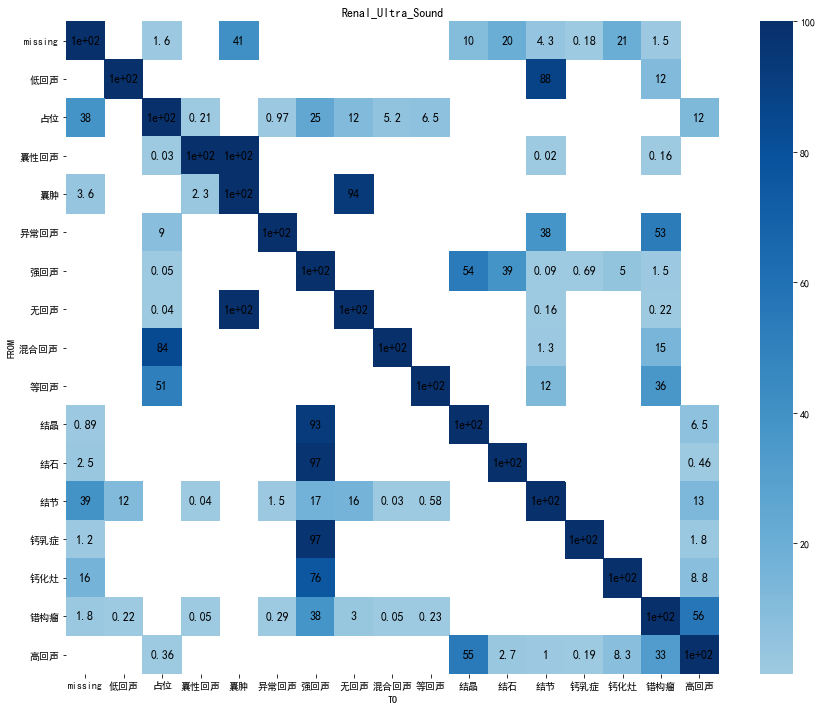

In [117]:
results2_ = results1_[results1_.columns].astype(float)

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(results2_,
                 annot=True,
             annot_kws={'size':12,'weight':'bold', 'color':'black'},
                 vmax=100, 
                 square=True, 
                 cmap="Blues",
                 center= 20
                )

ax.set_title('Renal_Ultra_Sound')
ax.set_xlabel('TO')
ax.set_ylabel("FROM")
# plt.rcParams['font.sans-serif']=['FangSong']
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.show()

#### 数据结构——图

In [131]:
results1 = results1_.fillna(float('inf'))

In [132]:
results1

,missing,低回声,占位,囊性回声,囊肿,异常回声,强回声,无回声,混合回声,等回声,结晶,结石,结节,钙乳症,钙化灶,错构瘤,高回声
missing,0,inf,1.56,inf,41.23,inf,inf,inf,inf,inf,10.4,20.24,4.3,0.18,20.61,1.49,inf
低回声,inf,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,88.22,inf,inf,11.78,inf
占位,38.47,inf,0,0.21,inf,0.97,24.75,11.62,5.18,6.46,inf,inf,inf,inf,inf,inf,12.34
囊性回声,inf,inf,0.03,0,99.79,inf,inf,inf,inf,inf,inf,inf,0.02,inf,inf,0.16,inf
囊肿,3.59,inf,inf,2.31,0,inf,inf,94.1,inf,inf,inf,inf,inf,inf,inf,inf,inf
异常回声,inf,inf,8.99,inf,inf,0,inf,inf,inf,inf,inf,inf,37.73,inf,inf,53.28,inf
强回声,inf,inf,0.05,inf,inf,inf,0,inf,inf,inf,54.03,38.64,0.09,0.69,4.95,1.53,inf
无回声,inf,inf,0.04,inf,99.57,inf,inf,0,inf,inf,inf,inf,0.16,inf,inf,0.22,inf
混合回声,inf,inf,83.94,inf,inf,inf,inf,inf,0,inf,inf,inf,1.26,inf,inf,14.8,inf
等回声,inf,inf,51.23,inf,inf,inf,inf,inf,inf,0,inf,inf,12.3,inf,inf,36.48,inf


In [123]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
class Graph_Matrix:
    """
    Adjacency Matrix
    """
    def __init__(self, vertices=[], matrix=[]):
        """
        :param vertices:a dict with vertex id and index of matrix , such as {vertex:index}
        :param matrix: a matrix
        """
        self.matrix = matrix
        self.edges_dict = {}  # {(tail, head):weight}
        self.edges_array = []  # (tail, head, weight)
        self.vertices = vertices
        self.num_edges = 0

        # if provide adjacency matrix then create the edges list
        if len(matrix) > 0:
            if len(vertices) != len(matrix):
                raise IndexError
            self.edges = self.getAllEdges()
            self.num_edges = len(self.edges)

        # if do not provide a adjacency matrix, but provide the vertices list, build a matrix with 0
        elif len(vertices) > 0:
            self.matrix = [[0 for col in range(len(vertices))] for row in range(len(vertices))]

        self.num_vertices = len(self.matrix)

    def isOutRange(self, x):
        try:
            if x >= self.num_vertices or x <= 0:
                raise IndexError
        except IndexError:
            print("节点下标出界")

    def isEmpty(self):
        if self.num_vertices == 0:
            self.num_vertices = len(self.matrix)
        return self.num_vertices == 0

    def add_vertex(self, key):
        if key not in self.vertices:
            self.vertices[key] = len(self.vertices) + 1

        # add a vertex mean add a row and a column
        # add a column for every row
        for i in range(self.getVerticesNumbers()):
            self.matrix[i].append(0)

        self.num_vertices += 1

        nRow = [0] * self.num_vertices
        self.matrix.append(nRow)

    def getVertex(self, key):
        pass

    def add_edges_from_list(self, edges_list):  # edges_list : [(tail, head, weight),()]
        for i in range(len(edges_list)):
            self.add_edge(edges_list[i][0], edges_list[i][1], edges_list[i][2], )

    def add_edge(self, tail, head, cost=0):
        # if self.vertices.index(tail) >= 0:
        #   self.addVertex(tail)
        if tail not in self.vertices:
            self.add_vertex(tail)
        # if self.vertices.index(head) >= 0:
        #   self.addVertex(head)
        if head not in self.vertices:
            self.add_vertex(head)

        # for directory matrix
        self.matrix[self.vertices.index(tail)][self.vertices.index(head)] = cost
        # for non-directory matrix
        # self.matrix[self.vertices.index(fromV)][self.vertices.index(toV)] = \
        #   self.matrix[self.vertices.index(toV)][self.vertices.index(fromV)] = cost

        self.edges_dict[(tail, head)] = cost
        self.edges_array.append((tail, head, cost))
        self.num_edges = len(self.edges_dict)

    def getEdges(self, V):
        pass

    def getVerticesNumbers(self):
        if self.num_vertices == 0:
            self.num_vertices = len(self.matrix)
        return self.num_vertices

    def getAllVertices(self):
        return self.vertices

    def getAllEdges(self):
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix)):
                if 0 < self.matrix[i][j] < float('inf'):
                    self.edges_dict[self.vertices[i], self.vertices[j]] = self.matrix[i][j]
                    self.edges_array.append([self.vertices[i], self.vertices[j], self.matrix[i][j]])

        return self.edges_array

    def __repr__(self):
        return str(''.join(str(i) for i in self.matrix))

    def to_do_vertex(self, i):
        print('vertex: %s' % (self.vertices[i]))

    def to_do_edge(self, w, k):
        print('edge tail: %s, edge head: %s, weight: %s' % (self.vertices[w], self.vertices[k], str(self.matrix[w][k])))
        
my_graph = Graph_Matrix()        

nodes: ['missing', '低回声', '占位', '囊性回声', '囊肿', '异常回声', '强回声', '无回声', '混合回声', '等回声', '结晶', '结石', '结节', '钙乳症', '钙化灶', '错构瘤', '高回声']
edges: [('missing', '占位'), ('missing', '囊肿'), ('missing', '结晶'), ('missing', '结石'), ('missing', '结节'), ('missing', '钙乳症'), ('missing', '钙化灶'), ('missing', '错构瘤'), ('低回声', '结节'), ('低回声', '错构瘤'), ('占位', 'missing'), ('占位', '囊性回声'), ('占位', '异常回声'), ('占位', '强回声'), ('占位', '无回声'), ('占位', '混合回声'), ('占位', '等回声'), ('占位', '高回声'), ('囊性回声', '占位'), ('囊性回声', '囊肿'), ('囊性回声', '结节'), ('囊性回声', '错构瘤'), ('囊肿', 'missing'), ('囊肿', '囊性回声'), ('囊肿', '无回声'), ('异常回声', '占位'), ('异常回声', '结节'), ('异常回声', '错构瘤'), ('强回声', '占位'), ('强回声', '结晶'), ('强回声', '结石'), ('强回声', '结节'), ('强回声', '钙乳症'), ('强回声', '钙化灶'), ('强回声', '错构瘤'), ('无回声', '占位'), ('无回声', '囊肿'), ('无回声', '结节'), ('无回声', '错构瘤'), ('混合回声', '占位'), ('混合回声', '结节'), ('混合回声', '错构瘤'), ('等回声', '占位'), ('等回声', '结节'), ('等回声', '错构瘤'), ('结晶', 'missing'), ('结晶', '强回声'), ('结晶', '高回声'), ('结石', 'missing'), ('结石', '强回声'), ('结石', '高回声'), ('结节', 'missing'), ('结节'

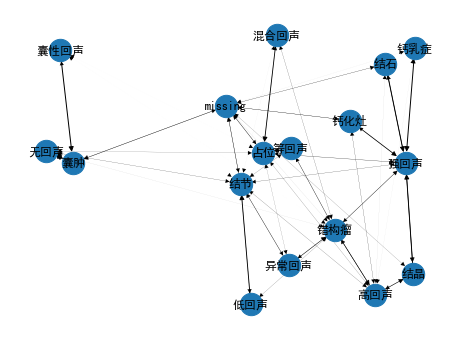

In [191]:
def draw_directed_graph(my_graph):
    G = nx.DiGraph()  # 建立一个空的无向图G
    for node in my_graph.vertices:
        G.add_node(str(node))
    G.add_weighted_edges_from(my_graph.edges_array)

    print("nodes:", G.nodes())  
    print("edges:", G.edges()) 
    print("number of edges:", G.number_of_edges())  
    
    plt.subplots(figsize=(8, 6))   
    nx.draw(G, with_labels=True,pos=nx.spring_layout(G),node_size = 500,
        width=[float(v['weight'])/100  for (r, c, v) in G.edges(data=True)])
    
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    plt.rcParams['axes.unicode_minus']=False
    plt.savefig("directed_graph.png")
    plt.show()
    return G
    
def create_directed_matrix(my_graph,data):
    data1 = data.fillna(float('inf'))
    nodes = list(data.columns)
    matrix = data1.values
    my_graph = Graph_Matrix(nodes, matrix)
    return my_graph

if __name__ == '__main__':
    my_graph = Graph_Matrix()
    created_graph = create_directed_matrix(my_graph,results1_)
    G = draw_directed_graph(created_graph)

In [180]:
# 生成邻近矩阵
a= nx.adjacency_matrix(G)
A=a.todense()

import numpy
numpy.savetxt('correlation_matrix.csv',A, delimiter = ',')


  (0, 2)	1.56
  (0, 4)	41.23
  (0, 10)	10.4
  (0, 11)	20.24
  (0, 12)	4.3
  (0, 13)	0.18
  (0, 14)	20.61
  (0, 15)	1.49
  (1, 12)	88.22
  (1, 15)	11.78
  (2, 0)	38.47
  (2, 3)	0.21
  (2, 5)	0.97
  (2, 6)	24.75
  (2, 7)	11.62
  (2, 8)	5.18
  (2, 9)	6.46
  (2, 16)	12.34
  (3, 2)	0.03
  (3, 4)	99.79
  (3, 12)	0.02
  (3, 15)	0.16
  (4, 0)	3.59
  (4, 3)	2.31
  (4, 7)	94.1
  :	:
  (12, 8)	0.03
  (12, 9)	0.58
  (12, 16)	12.92
  (13, 0)	1.23
  (13, 6)	96.95
  (13, 16)	1.81
  (14, 0)	15.67
  (14, 6)	75.51
  (14, 16)	8.83
  (15, 0)	1.84
  (15, 1)	0.22
  (15, 3)	0.05
  (15, 5)	0.29
  (15, 6)	38.13
  (15, 7)	2.96
  (15, 8)	0.05
  (15, 9)	0.23
  (15, 16)	56.23
  (16, 2)	0.36
  (16, 10)	54.79
  (16, 11)	2.67
  (16, 12)	1.01
  (16, 13)	0.19
  (16, 14)	8.35
  (16, 15)	32.63
[[0.000e+00 0.000e+00 1.560e+00 0.000e+00 4.123e+01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.040e+01 2.024e+01 4.300e+00 1.800e-01
  2.061e+01 1.490e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

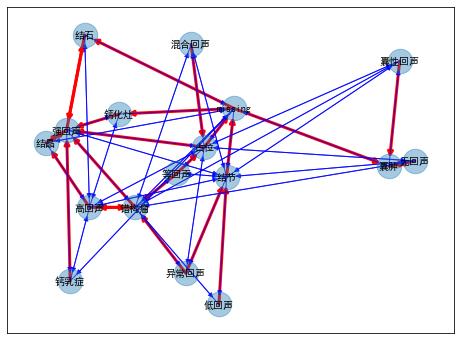

In [203]:
def draw_directed_graph(my_graph):
    G = nx.DiGraph()  # 建立一个空的无向图G
    for node in my_graph.vertices:
        G.add_node(str(node))
    G.add_weighted_edges_from(my_graph.edges_array) 
    
    plt.subplots(figsize=(8, 6)) 
    
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight']>20]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if (d['weight']>0)&(d['weight']<=20)]
    nx.circular_layout(G)##图的布局方式，圆形
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,alpha=0.4,node_size = 600)
    #设置边的形式
    nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3,alpha=1,edge_color='r')
    nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.8,edge_color='b',style='dashed')
    nx.draw_networkx_labels(G,pos,font_size=10)
    
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    plt.rcParams['axes.unicode_minus']=False
    plt.savefig("directed_graph.png")
    plt.show()
    return G
    
def create_directed_matrix(my_graph,data):
    data1 = data.fillna(float('inf'))
    nodes = list(data.columns)
    matrix = data1.values
    my_graph = Graph_Matrix(nodes, matrix)
    return my_graph

if __name__ == '__main__':
    my_graph = Graph_Matrix()
    created_graph = create_directed_matrix(my_graph,results1_)
    G = draw_directed_graph(created_graph)

#### 20201224 描述-结论

In [13]:
TagOrderCode = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\TagOrderCode.pkl")

In [10]:
solid = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",index_col = None)

In [11]:
solid

,Unnamed: 0,desc,summ,solid
0,0,强回声,结晶,2
1,1,强回声,结石,2
2,2,强回声,囊肿,0
3,3,强回声,错构瘤,1
4,4,强回声,钙乳症,2
...,...,...,...,...
67,67,囊性回声,钙乳症,0
68,68,囊性回声,占位,1
69,69,囊性回声,钙化灶,0
70,70,囊性回声,missing,0


In [15]:
from itertools import product

In [65]:
def Count_and_Disassemble(TagOrderCode,solid_path):
    df = TagOrderCode.applymap(lambda x: tuple(x))
    df_tuple = pd.DataFrame(df.groupby(['desclist','summlist'])['ORDER_CODE'].count()).reset_index()
    solid = pd.read_excel(solid_path)
    
    desc_list = []
    summ_list = []
    count_list = []
    source_model = []
    S_NO_desc = []
    S_NO_summ = []
    S_NO_count = []

    for line in df_tuple.values:
#         print(line)
#         print(line[0])
#         print(line[1])
        desc = eval(str(line[0]))
        summ = eval(str(line[1]))
        count = line[2]  

        if len(summ)==0:
            source = "missing"
            for index in range(len(desc)):
                descsub = desc[index]
                desc_list.append(descsub)
                summ_list.append(0)
                count_list.append(count)
                source_model.append(source)

        elif (len(desc)== 1 & len(summ)==1):
            source = "complete"
            desc_list.append(desc[0])
            summ_list.append(summ[0])
            count_list.append(count)
            source_model.append(source)
        else :
            source = "split"
            descsub_list = []
            summsub_list = []

            for n in product(desc,summ):
                dfsub = pd.DataFrame(product(desc,summ), columns = ['desc','summ'])
                dfsub_solid_merge = pd.merge(dfsub,solid,how = 'left')
                df_new = dfsub_solid_merge.loc[dfsub_solid_merge.solid.values != 0,["desc","summ"]]
            if dfsub_solid_merge.solid.values.sum()== 0 :
                    S_NO_desc.append(desc)
                    S_NO_summ.append(summ)
                    S_NO_count.append(count)                      
            for index_n, item in enumerate (np.unique(df_new.desc)):
                countsub = count/len(np.unique(df_new.desc))
                summsublist = df_new.loc[df_new["desc"].isin ([item]),'summ']
                for summsub_ in summsublist:
                    countsub_ = countsub/len(summsublist)
                    desc_list.append(item)
                    summ_list.append(summsub_)
                    count_list.append(countsub_)
                    source_model.append(source)
    final = pd.DataFrame({"desc":desc_list,"summ":summ_list,"count":count_list,"source_model":source_model}) 
    NO_ = pd.DataFrame({"desc":S_NO_desc,"summ":S_NO_summ,"count":S_NO_count})
    return final,NO_

final,NO = Count_and_Disassemble(TagOrderCode,r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx")
final

,desc,summ,count,source_model
0,低回声,0,274.00,missing
1,低回声,占位,32.00,complete
2,低回声,占位,1.00,split
3,低回声,结节,1.00,split
4,低回声,占位,1.00,split
...,...,...,...,...
1436,混合回声,0,1.00,missing
1437,囊性回声,0,1.00,missing
1438,等回声,错构瘤,0.50,split
1439,高回声,结晶,0.25,split


In [76]:
solid = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",index_col= False )
solid = solid.iloc[:,1:]

In [77]:
solid

,desc,summ,solid
0,强回声,结晶,2
1,强回声,结石,2
2,强回声,囊肿,0
3,强回声,错构瘤,1
4,强回声,钙乳症,2
...,...,...,...
67,囊性回声,钙乳症,0
68,囊性回声,占位,1
69,囊性回声,钙化灶,0
70,囊性回声,missing,0


In [78]:
final1 = final.copy()
final1.loc[final1["summ"] == 0,"summ"] ="missing"
final_ = pd.merge(final1,solid,left_on =[ "desc" ,"summ"] ,right_on = ["desc","summ"])
final_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224\final_.xlsx")
NO.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224\NO.xlsx")
class_dict = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",sheet_name = "Sheet2")
final_solid = pd.DataFrame(final_.groupby(['desc','summ','source_model',"solid"])["count"].sum())
final_solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224\final_solid.xlsx")
final_solid1 = final_solid.copy()
final_solid1 = final_solid1.reset_index(['desc','summ','source_model','solid'])
class_df = pd.merge(final_solid1,class_dict,left_on = ["source_model","solid"],right_on = ["source_model","solid"])
pic_df = class_df.loc[:,["desc","summ","count","result"]]
pic_df_ = pd.DataFrame(pic_df.groupby(["desc","summ","result"])["count"].sum())
pic_df_ = pic_df_.reset_index(['desc','summ','result'])
pic_df_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224\pic.xlsx")

pic_df_1 = pic_df_.loc[pic_df_["result"] != "NO",:] # label为NO的订单不计算占比
calu = pd.pivot_table(pic_df_1,index = "desc",columns = "summ",values = "count",aggfunc = np.sum)
calu["sum"] = calu.sum(axis = 1)
picdf1 = pd.DataFrame(pic_df_.groupby(["desc",'summ'])["count"].sum()).reset_index(["desc",'summ'])
sum1 = pd.merge(picdf1,calu,left_on =[ "desc"] ,right_on = ["desc"])
sum2 = sum1.loc[:,['desc','summ','count','sum']]
sum2['count_per'] = sum2['count']/sum2['sum']*100
sum3 = pd.merge(pic_df_,sum2,left_on =["desc","summ"] ,right_on = ["desc","summ"])
sum4= sum3.loc[sum3['result'] == "Maybe",:]
sum4["Maybe_per"] = sum4['count_x']/sum4['count_y']*100
sum4 = sum4.loc[:,['desc','summ','Maybe_per']]
sum5 = pd.merge(sum2,sum4,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
nodf = pic_df_.loc[pic_df_['result'] == "NO",['desc','summ','result']]
sum6 = pd.merge(sum5,nodf,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
sum6.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224\summary.xlsx")

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
set(final1.summ)

{'missing', '占位', '囊肿', '结晶', '结石', '结节', '钙乳症', '钙化灶', '错构瘤'}

In [79]:
sum61 = sum6.copy()

In [80]:
sum61

,desc,summ,count,sum,count_per,Maybe_per,result
0,低回声,missing,337.000000,442.000000,76.244344,NaN,NaN
1,低回声,占位,40.000000,442.000000,9.049774,20.000000,NaN
2,低回声,囊肿,27.000000,442.000000,6.108597,NaN,NO
3,低回声,结晶,1.000000,442.000000,0.226244,NaN,NO
4,低回声,结石,3.000000,442.000000,0.678733,NaN,NO
5,低回声,结节,56.583333,442.000000,12.801659,25.773196,NaN
6,低回声,钙化灶,1.000000,442.000000,0.226244,NaN,NO
7,低回声,错构瘤,8.416667,442.000000,1.904223,52.475248,NaN
8,囊性回声,missing,220.000000,1404.250000,15.666726,NaN,NaN
9,囊性回声,占位,0.708333,1404.250000,0.050442,100.000000,NaN


#### 结论——描述

In [28]:
df_tuple = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\C1.xlsx")

In [38]:
df_tuple = df_tuple.iloc[:,1:]

In [30]:
solid = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\solid.xlsx")

,summ,desc,solid
0,结晶,强回声,1
1,结石,强回声,1
2,囊肿,强回声,0
3,错构瘤,强回声,1
4,钙乳症,强回声,1
...,...,...,...
67,错构瘤,囊性回声,1
68,钙乳症,囊性回声,0
69,占位,囊性回声,1
70,钙化灶,囊性回声,0


In [99]:
def Count_and_Disassemble(df_tuple,solid_path):
#     df = TagOrderCode.applymap(lambda x: tuple(x))
#     df_tuple = pd.DataFrame(df.groupby(['summlist','desclist'])['ORDER_CODE'].count()).reset_index()
#     solid = pd.read_excel(solid_path)
#     df_tuple = df_tuple    
    desc_list = []
    summ_list = []
    count_list = []
    source_model = []
    S_NO_desc = []
    S_NO_summ = []
    S_NO_count = []

    for line in df_tuple.values:
#         print(line)
#         print(line[0])
#         print(line[1])
        summ = eval(str(line[1]))
        desc = eval(str(line[0]))
        count = line[2]  

        if len(desc)==0:
            source = "missing"
            for index in range(len(summ)):
                summsub = summ[index]
                summ_list.append(summsub)
                desc_list.append(0)
                count_list.append(count)
                source_model.append(source)

        elif (len(summ)== 1 & len(desc)==1):
            source = "complete"
            desc_list.append(desc[0])
            summ_list.append(summ[0])
            count_list.append(count)
            source_model.append(source)
        else :
            source = "split"
            descsub_list = []
            summsub_list = []

            for n in product(summ,desc):
                dfsub = pd.DataFrame(product(summ,desc), columns = ['summ','desc'])
                dfsub_solid_merge1 = pd.merge(dfsub,solid,how = 'left')
                df_new = dfsub_solid_merge1.loc[dfsub_solid_merge1.solid.values != 0,["summ","desc"]]

            if dfsub_solid_merge1.solid.values.sum()== 0 :
                    S_NO_desc.append(desc)
                    S_NO_summ.append(summ)
                    S_NO_count.append(count)                      
            for index_n, item in enumerate (np.unique(df_new.summ)):
                countsub = count/len(np.unique(df_new.summ))
                descsublist = df_new.loc[df_new["summ"].isin ([item]),'desc']
                for descsub_ in descsublist:
                    countsub_ = countsub/len(descsublist)
                    summ_list.append(item)
                    desc_list.append(descsub_)
                    count_list.append(countsub_)
                    source_model.append(source)
    final = pd.DataFrame({"summ":summ_list,"desc":desc_list,"count":count_list,"source_model":source_model}) 
    NO_ = pd.DataFrame({"summ":S_NO_summ,"desc":S_NO_desc,"count":S_NO_count})
    return final,NO_

final,NO = Count_and_Disassemble(df_tuple,r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201217\solid.xlsx")

In [40]:
final

,summ,desc,count,source_model
0,占位,0,20.00,missing
1,占位,0,1.00,missing
2,结节,0,1.00,missing
3,占位,0,1.00,missing
4,钙化灶,0,1.00,missing
...,...,...,...,...
1441,囊肿,无回声,1.00,split
1442,结晶,高回声,1.00,split
1443,结晶,高回声,0.50,split
1444,错构瘤,高回声,0.25,split


In [101]:
NO.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224_\NO.xlsx")

In [49]:
final1 = final.copy()
final1.loc[final1["desc"] == 0,"desc"] ="missing"
final_ = pd.merge(final1,solid,left_on =[ "desc" ,"summ"] ,right_on = ["desc","summ"])

In [53]:
final_solid1

,summ,desc,source_model,solid,count
0,占位,missing,missing,1,62.000000
1,占位,低回声,complete,0,32.000000
2,占位,囊性回声,split,1,0.361111
3,占位,异常回声,complete,1,1.000000
4,占位,异常回声,split,1,0.562500
...,...,...,...,...,...
79,错构瘤,混合回声,split,1,0.472222
80,错构瘤,等回声,complete,1,6.000000
81,错构瘤,等回声,split,1,1.416667
82,错构瘤,高回声,complete,1,1593.000000


In [57]:
sum5

,desc,summ,count,sum,count_per,Maybe_per
0,missing,占位,62.000000,166.566667,37.222333,NaN
1,低回声,占位,32.000000,166.566667,19.211527,NaN
2,囊性回声,占位,0.361111,166.566667,0.216797,100.000000
3,异常回声,占位,1.562500,166.566667,0.938063,36.000000
4,强回声,占位,42.493056,166.566667,25.511140,90.586697
5,无回声,占位,19.923611,166.566667,11.961343,74.904148
6,混合回声,占位,8.347222,166.566667,5.011340,28.119800
7,等回声,占位,10.416667,166.566667,6.253752,23.200000
8,高回声,占位,21.462500,166.566667,12.885231,67.384974
9,missing,囊肿,1638.000000,49583.050000,3.303548,NaN


In [50]:
final_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224_\final_.xlsx")
NO.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224_\NO.xlsx")
class_dict = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201202\solid.xlsx",sheet_name = "Sheet2")
final_solid = pd.DataFrame(final_.groupby(['summ','desc','source_model',"solid"])["count"].sum())
final_solid.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224_\final_solid.xlsx")
final_solid1 = final_solid.copy()
final_solid1 = final_solid1.reset_index(['summ','desc','source_model','solid'])
class_df = pd.merge(final_solid1,class_dict,left_on = ["source_model","solid"],right_on = ["source_model","solid"])
pic_df = class_df.loc[:,["desc","summ","count","result"]]
pic_df_ = pd.DataFrame(pic_df.groupby(["summ","desc","result"])["count"].sum())
pic_df_ = pic_df_.reset_index(['summ','desc','result'])
pic_df_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224_\pic.xlsx")

pic_df_1 = pic_df_.loc[pic_df_["result"] != "NO",:]
calu = pd.pivot_table(pic_df_1,index = "summ",columns = "desc",values = "count",aggfunc = np.sum)
calu["sum"] = calu.sum(axis = 1)
picdf1 = pd.DataFrame(pic_df_.groupby(['summ',"desc"])["count"].sum()).reset_index(['summ',"desc"])
sum1 = pd.merge(picdf1,calu,left_on =["summ"] ,right_on = ["summ"])
sum2 = sum1.loc[:,['desc','summ','count','sum']]
sum2['count_per'] = sum2['count']/sum2['sum']*100
sum3 = pd.merge(pic_df_,sum2,left_on =["desc","summ"] ,right_on = ["desc","summ"])
sum4= sum3.loc[sum3['result'] == "Maybe",:]
sum4["Maybe_per"] = sum4['count_x']/sum4['count_y']*100
sum4 = sum4.loc[:,['desc','summ','Maybe_per']]
sum5 = pd.merge(sum2,sum4,left_on =["desc","summ"] ,right_on = ["desc","summ"],how = "outer")
nodf = pic_df_.loc[pic_df_['result'] == "NO",['desc','summ','result']]
sum6 = pd.merge(sum5,nodf,left_on =["summ","desc"] ,right_on = ["summ","desc"],how = "outer")
sum6.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224_\summary.xlsx")

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 矩阵

In [87]:
data = pd.read_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224\data.xlsx")

In [88]:
import seaborn as sns 
import itertools 
import matplotlib.pyplot as plt

results = pd.DataFrame(index=[i for i in np.unique(data.desc)],\
        columns=[i for i in np.unique(data.summ)])

for desc,summ in itertools.product(np.unique(data.desc),\
                               np.unique(data.summ)):
    data1 = data.loc[data.desc== desc,:]
    if desc == summ:
        perc = [0]
        results.loc[desc, summ] = 0
    else:
        perc = data1.loc[data1.summ== summ,"count_per"].values
        if len(perc):
            results.loc[desc, summ] = round(perc[0],2)
        else:
            continue
        
results

,missing,低回声,占位,囊性回声,囊肿,异常回声,强回声,无回声,混合回声,等回声,结晶,结石,结节,钙乳症,钙化灶,错构瘤,高回声
missing,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
低回声,76.24,0,9.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,NaN,NaN,1.9,NaN
占位,37.22,NaN,0,0.22,NaN,0.94,25.51,11.96,5.01,6.25,NaN,NaN,NaN,NaN,NaN,NaN,12.89
囊性回声,15.67,NaN,0.05,0,84.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,0.17,NaN
囊肿,3.3,NaN,NaN,2.34,0,NaN,NaN,94.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
异常回声,88.65,NaN,0.97,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4.41,NaN,NaN,5.97,NaN
强回声,0.85,NaN,0.05,NaN,NaN,NaN,0,NaN,NaN,NaN,52.53,38.39,0.09,1.26,5.37,1.47,NaN
无回声,1.49,NaN,0.04,NaN,98.09,NaN,NaN,0,NaN,NaN,NaN,NaN,0.15,NaN,NaN,0.23,NaN
混合回声,68.25,NaN,25.83,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0.71,NaN,NaN,5.21,NaN
等回声,62.71,NaN,19.49,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4.24,NaN,NaN,13.56,NaN


In [89]:
results.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224\matrix1.xlsx")

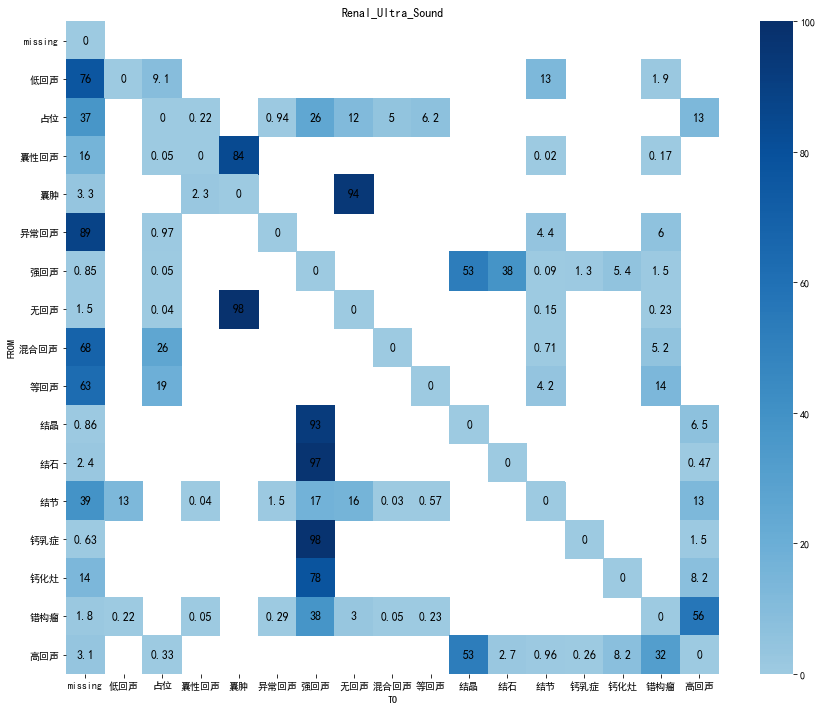

In [90]:
results2_ = results[results.columns].astype(float)

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(results2_,
                 annot=True,
#                  cmap="rainbow",
             annot_kws={'size':12,'weight':'bold', 'color':'black'},
                 vmax=100, 
                 square=True, 
                 cmap="Blues",
                 center= 20
                )

ax.set_title('Renal_Ultra_Sound')
ax.set_xlabel('TO')
ax.set_ylabel("FROM")
# plt.rcParams['font.sans-serif']=['FangSong']
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.show()

#### 20201225 钙乳症

In [102]:
import pymysql
import pandas as pd
import numpy as np

In [103]:
conn=pymysql.connect(host='mysql-backup.shanzhen.me',
                     user='readonly_medicine_liuqq',
                     password="r3g1^QWgV8GeYJw4",
                     database='asgard_dataplatform',
                     port= 3001,
                     charset='utf8')

In [104]:
id_list_ = ["OBDIM0006Tag0030"]

tag_df_ = pd.DataFrame()

for items in id_list_:
    id_str = "'"+ items + "'"
    tagsql = 'SELECT ORDER_CODE,TAG_ID \
    FROM t66_apollo_offline_analysis_tag \
    WHERE SOURCE_TYPE = 1 \
    AND SZ_STATUS = 1 AND TAG_ID IN ('+id_str+') '
    tag = pd.read_sql(tagsql,con=conn)
    tag_df_ = pd.concat([tag_df_,tag],axis = 0) 
    
tag_df_ 

,ORDER_CODE,TAG_ID
0,385927579832,OBDIM0006Tag0030
1,000367011493,OBDIM0006Tag0030
2,386255498160,OBDIM0006Tag0030
3,000609239134,OBDIM0006Tag0030
4,000954692779,OBDIM0006Tag0030
...,...,...
1793,381059850712,OBDIM0006Tag0030
1794,382595686483,OBDIM0006Tag0030
1795,383559558906,OBDIM0006Tag0030
1796,384193558607,OBDIM0006Tag0030


In [105]:
Recode_df_ = pd.DataFrame()

for items in tag_df_.ORDER_CODE:
    ORDER_CODE_str = "'"+ items + "'"
    
    sqlstr = "SELECT DISTINCT RR.ORDER_CODE,RR2.RAW_NAME,RR.RAW_NAME,RR.RAW_RESULT AS '三级项结果',RR2.RAW_RESULT AS '小结',DR.SD_CODE \
    FROM T66_ATHENA_BASIC_RAW_RECORD AS RR LEFT JOIN T66_ATHENA_BASIC_DESCRIPTIVE_RECORD AS DR ON RR.ORDER_CODE = DR.ORDER_CODE \
    AND RR.RECORD_CODE = DR.RECORD_CODE AND DR.SD_CODE IN ('S0000005D','S0000006D','S0000007D') \
    AND RR.ORDER_CODE IN (" + ORDER_CODE_str + ")AND DR.SZ_STATUS = 1 \
    LEFT JOIN T66_ATHENA_BASIC_RAW_RECORD AS RR2 ON RR.ORDER_CODE = RR2.ORDER_CODE \
    AND RR.PARENT_RECORD_CODE = RR2.RECORD_CODE \
    WHERE \
    DR.ID IS NOT NULL \
    AND RR.SZ_STATUS = 1 \
    AND DR.SZ_STATUS = 1 \
    AND RR2.SZ_STATUS = 1 " 

    Recode_ = pd.read_sql(sqlstr,con=conn)
    Recode_df_ = pd.concat([Recode_df_,Recode_],axis = 0) 

Recode_df_

,ORDER_CODE,RAW_NAME,RAW_NAME,三级项结果,小结,SD_CODE
0,385927579832,超声检查室,双肾,双肾内见点状强回声。左肾内见无回声区，大小约10×8mm，其内见钙乳回声。CDFI：血流显示正常。,双肾结晶\r\n左肾钙乳症,S0000005D
0,000367011493,超声检查室,双肾,左肾形态大小位置正常，包膜完整，实质回声正常。右肾内见无回声区，大小约9×8mm，其内见钙乳...,右肾钙乳症\r\n脾大 (请结合临床),S0000005D
0,386255498160,彩超室,双肾,双肾形态大小正常范围，包膜光滑，集合系统未见明显分离。右肾内见无回声区，大小约12x13mm...,肝囊肿\r\n胆囊息肉\r\n右肾钙乳症\r\n胰、脾、左肾目前未见明显占位性病变,S0000005D
0,000609239134,上腹部超声,左肾,左肾大小正常，实质回声均匀，肾内可见点状强回声，后方不伴声影。肾内见一大小约11mmx8mm...,肝:脂肪肝（轻度）\r\n右肾:右肾结晶\r\n右肾结石\r\n右肾囊肿\r\n左肾:左肾结...,S0000006D
1,000609239134,上腹部超声,右肾,右肾大小正常，实质回声均匀，肾内可见点状强回声，后方不伴声影。肾下盏可见一个强回声，直径约3...,肝:脂肪肝（轻度）\r\n右肾:右肾结晶\r\n右肾结石\r\n右肾囊肿\r\n左肾:左肾结...,S0000007D
...,...,...,...,...,...,...
0,383559558906,腹部超声,左肾,左肾形态大小正常，实质回声均匀。肾内见一大小约11mmx 10mm的无回声区，其内见点状强回...,肝:脂肪肝（轻度）\r\n肝囊肿（多发）\r\n左肾:左肾钙乳症\r\n右肾:右肾结晶\r\...,S0000006D
1,383559558906,腹部超声,右肾,右肾形态大小正常，包膜光整，实质回声均匀，肾可见一个点状强回声，后无明显声影。集合系统未见分离。,肝:脂肪肝（轻度）\r\n肝囊肿（多发）\r\n左肾:左肾钙乳症\r\n右肾:右肾结晶\r\...,S0000007D
0,384193558607,彩超室,双肾,双肾形态大小正常范围，包膜光滑，集合系统未见明显分离。左肾盏周边部可见无回声区，大小约12....,1.脂肪肝\r\n2.肝囊肿\r\n3.肝脏稍强回声，考虑肝血管瘤可能，建议进一步检查\r\...,S0000005D
0,384871260130,腹部超声,左肾,左肾形态大小正常，包膜光整，实质回声均匀，肾内可见一类圆形稍高回声区，边界清晰，大小约\r\...,左肾:左肾错构瘤\r\n右肾:右肾钙乳症\r\n肝、胆、胰、脾未发现明显异常,S0000006D


In [106]:
Recode_df_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201224_\钙乳症分析.xlsx")